In [2]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt

In [3]:

def qdef(n,q):
    return (q**(n/2)-q**(-n/2))/(q**(1/2)-q**(-1/2))
    
def nfacq(n,q):
    y=1
    for i in range(1,n+1):
        y*= qdef(i,q)
    return y

def delta(j1,j2,j3,q):
    return (nfacq(-j1+j2+j3,q)*nfacq(j1-j2+j3,q)*nfacq(j1+j2-j3,q)/nfacq(j1+j2+j3+1,q))**0.5

def sixj(j1,j2,j12,j3,j,j23,q):
    fac=delta(j1,j2,j12,q)*delta(j12,j3,j,q)*delta(j2,j3,j23,q)*delta(j1,j23,j,q)
    a1=j1+j2+j12
    a2=j+j3+j12
    a3=j1+j+j23
    a4=j2+j3+j23
    b1=j1+j2+j+j3
    b2=j1+j3+j12+j23
    b3=j2+j+j12+j23
    
    zmin=np.max([a1,a2,a3,a4])
    zmax=np.min([b1,b2,b3])
    w=0
    for z in range(zmin,zmax+1):
        den= nfacq(z-j1-j2-j12,q)*nfacq(z-j12-j3-j,q)*nfacq(z-j2-j3-j23,q)\
            *nfacq(z-j1-j23-j,q)*nfacq(j1+j2+j3+j-z,q)*nfacq(j1+j12+j3+j23-z,q)\
            *nfacq(j2+j12+j+j23-z,q)
        w += (-1)**z* nfacq(z+1,q)/den
    return w*fac

def Fsym(j1,j2,j3,j,j12,j23,q):
    return (-1)**(j1+j2+j3+j)* (qdef(2*j12+1,q)*qdef(2*j23+1,q))**0.5 *sixj(j1,j2,j12,j3,j,j23,q)
    
def Rsym(j1,j2,j,q):
    return (-1)**(j-j1-j2) * q**((j*(j+1)-j1*(j1+1)-j2*(j2+1))/2)

def qdim(j,k):
    return np.sin((2*j+1)*pi/(k+2))/np.sin(pi/(k+2))

In [6]:
k=5
q= np.exp(1j*2*pi/(k+2))
d1=qdim(1,k)
d2=qdim(2,k)

p0= 1/d2

R11_2=Rsym(1,1,2,q)
R21_2=Rsym(2,1,2,q)
R12_1=Rsym(1,2,1,q)
R22_1=Rsym(2,2,1,q)

F111_1_22=Fsym(1,1,1,1,2,2,q)
F121_1_22=Fsym(1,2,1,1,2,2,q)
F111_2_22=Fsym(1,1,1,2,2,2,q)
F121_2_22=Fsym(1,2,1,2,2,2,q)

F212_1_11=Fsym(2,1,2,1,1,1,q)
F222_1_11=Fsym(2,2,2,1,1,1,q)
F212_2_11=Fsym(2,1,2,2,1,1,q)
F222_2_11=Fsym(2,2,2,2,1,1,q)

plist=np.linspace(0,1,100)
plist=[p0]
rT1=np.zeros(len(plist))
rT2=np.zeros(len(plist))

for i_p in range(len(plist)):
    p1=plist[i_p]
    p2=1-p1
    rT1[i_p]= d1/d2*np.abs( p1*R11_2*F111_1_22+p2*R21_2*F121_1_22)\
    + np.abs( p1*R11_2*F111_2_22+p2*R21_2*F121_2_22)
    
    rT2[i_p]= np.abs( p1*R12_1*F212_1_11+p2*R22_1*F222_1_11)\
    + d2/d1*np.abs( p1*R12_1*F212_2_11+p2*R22_1*F222_2_11)
    

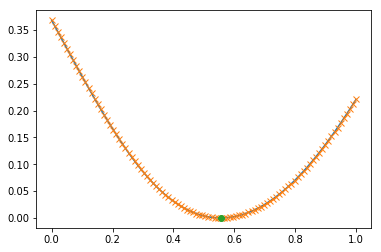

In [5]:
plt.figure()
plt.plot(plist,np.log(rT1),'-')
plt.plot(plist,np.log(rT2),'x')
# plt.plot([p0,p0],[0,0.5])
plt.plot(p0,0,'o')
plt.show()

In [7]:
print(rT1,rT2)

[1.] [1.]
